# COLLABORATIVE-BASED RECOMMENDATION USING MATRIX FACTORIZATION

In [1]:
!pip install scikit-surprise  ## dowloading the suprise library

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162990 sha256=c0a878c02141f9928d4b66f3a89477b51b205598a0c15c6b0443dc8b7f2641f2
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [2]:
## importing necessaries libraries
import pandas as pd
import numpy as np
import pandas as pd
from surprise import Dataset, Reader
import matplotlib.pyplot as plt
from surprise import SVD
from surprise.model_selection import train_test_split

In [3]:
df = pd.read_csv("movies.csv")  ## importing the dataset

## Matrix factorization for movie recommendation is a technique that decomposes the user-item interaction matrix into lower-dimensional matrices representing latent features. By multiplying these matrices, missing ratings are predicted, enabling personalized recommendations. It's widely used in collaborative filtering-based recommender systems, offering efficient and scalable solutions for handling large-scale datasets and capturing user preferences and item characteristics.

In [4]:
# loading ratings data from the MovieLens dataset
ratings_df = pd.read_csv('ratings.csv')

# defining the reader the reader **
reader = Reader(rating_scale=(1, 5))

# loading  the data into the Surprise dataset **
data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)

# splitting the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

In [5]:
# using the SVD algorithm (Matrix Factorization)
model = SVD()

# training the model on the training set
model.fit(trainset)

In [6]:
# making predictions for a specific user
user_id = 1
user_ratings = []
for movie_id in ratings_df['movieId'].unique():
    user_ratings.append((movie_id, model.predict(user_id, movie_id).est))

# sorting the predictions by estimated rating
user_ratings.sort(key=lambda x: x[1], reverse=True)

In [7]:
# display the top N recommendations
top_n = 5
print(f"Top {top_n} recommendations for user {user_id}:")
for i, (movie_id, rating) in enumerate(user_ratings[:top_n], start=1):
    name = df[df["movieId"] == movie_id].iloc[:, 1].tolist()[0]
    print(f"{i}. Movie Name: {name}, Estimated Rating: {rating}")

Top 5 recommendations for user 1:
1. Movie Name: Usual Suspects, The (1995), Estimated Rating: 5
2. Movie Name: Forrest Gump (1994), Estimated Rating: 5
3. Movie Name: Monty Python and the Holy Grail (1975), Estimated Rating: 5
4. Movie Name: Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981), Estimated Rating: 5
5. Movie Name: Goodfellas (1990), Estimated Rating: 5


In [8]:
from surprise.model_selection import cross_validate  ## importing cross_validate to evaluate the model

In [9]:
# perform cross-validation
cv_results = cross_validate(model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# get average RMSE and MAE
avg_rmse = sum(cv_results['test_rmse']) / len(cv_results['test_rmse'])
avg_mae = sum(cv_results['test_mae']) / len(cv_results['test_mae'])

print(f'Average RMSE: {avg_rmse}')
print(f'Average MAE: {avg_mae}')

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8687  0.8748  0.8740  0.8839  0.8668  0.8736  0.0060  
MAE (testset)     0.6662  0.6730  0.6715  0.6783  0.6684  0.6715  0.0042  
Fit time          1.35    1.31    1.33    1.38    1.58    1.39    0.10    
Test time         0.29    0.11    0.22    0.13    0.18    0.18    0.06    
Average RMSE: 0.8736416253446839
Average MAE: 0.6714721854360642


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8711  0.8768  0.8727  0.8695  0.8789  0.8738  0.0035  
MAE (testset)     0.6734  0.6708  0.6702  0.6686  0.6731  0.6712  0.0018  
Fit time          1.77    1.39    1.65    1.34    1.38    1.51    0.17    
Test time         0.22    0.14    0.24    0.13    0.22    0.19    0.04    
Average RMSE: 0.8738002443117358
Average MAE: 0.6712190165973191


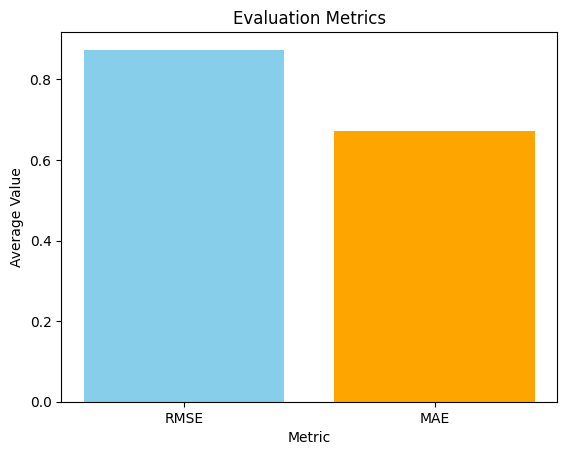

In [10]:
## plotting the loss curve
# perform cross-validation
cv_results = cross_validate(model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
# get average RMSE and MAE
avg_rmse = sum(cv_results['test_rmse']) / len(cv_results['test_rmse'])
avg_mae = sum(cv_results['test_mae']) / len(cv_results['test_mae'])

print(f'Average RMSE: {avg_rmse}')
print(f'Average MAE: {avg_mae}')

# plot the evaluation results
plt.bar(['RMSE', 'MAE'], [avg_rmse, avg_mae], color=['skyblue', 'orange'])
plt.xlabel('Metric')
plt.ylabel('Average Value')
plt.title('Evaluation Metrics')
plt.show()
